In [1]:
import os
import numpy as np
import pandas as pd
from datetime import *
from imu_video_synch import *
from zurich_move_data_extraction import *
from zurich_move_utilites import *
from gm_function import *

C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Import dataset 
folder = 'angle_tests'

# test0
# sensor lying on the table, expected pitch=0, yaw=0
test0 = os.path.join(folder, 'test0.mat')

# test1
# sensor lying on the table +full yaw rotation, expected pitch=0, yaw=0-180 180-0
test1 = os.path.join(folder, 'test1.mat')

#test2
#elevation 0 to 90, 90 to 0, 0 to -90
test2 = os.path.join(folder, 'test2.mat')

#test3 
#elevation 0 to 90, 90 to 0, 0 to -90 then yaw 0 to 90 then 0 too -90
test3 = os.path.join(folder, 'test3.mat')

In [3]:
# Define the sensor placements, sensor features, and dataframe features
sensor_placement = ['LW']
matlab_sensor_features = ['acc', 'gyro', 'quat', 'accHiG', 'magneto', 'press']
sensor_features = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'quat_0', 'quat_1', 'quat_2',
                   'quat_3', 'accHiG_x', 'accHiG_y', 'accHiG_z', 'magneto_x', 'magneto_y', 'magneto_z', 'press']
sensor_9DOF_features = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ',
                       'magnetoX', 'magnetoY', 'magnetoZ']
sensor_acc_features =  ['acc_x', 'acc_y', 'acc_z']

In [4]:
# Current test to explore
imu_path = test0

In [5]:
imu_path

'angle_tests\\test0.mat'

In [6]:
#Extract useful stuff
header = extract_header_data_from_mat_file(imu_path)
sampling_freq =get_sampling_freq(header)
time_array = extract_time_data_from_mat_file(imu_path)
recording_time = get_recording_time(time_array)
dfs = extract_sensors_data_from_mat_file(imu_path, sensor_placement, matlab_sensor_features, sensor_features)
#Usefull export to csv (for SimuLOOP script)
#export_to_csv(file_path, dfs, sensor_placement, matlab_sensor_features, sensor_features)
acc_LW = dfs['LW'][['acc_x', 'acc_y', 'acc_z']]
gyro_LW = dfs['LW'][['gyro_x', 'gyro_y', 'gyro_z']]
mag_LW = dfs['LW'][['magneto_x', 'magneto_y', 'magneto_z']]
quat_sensor_LW = dfs['LW'][['quat_0', 'quat_1', 'quat_2','quat_3']]
LW_data = dfs['LW']

In [7]:
LW_data

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,-0.567891,-0.353413,-1.851719,-20.614151,22.325270,-27.919854,0.055265,-0.699383,0.712147,-0.025580,-0.492991,-0.195766,-2.159199,366.599271,142.207203,69.607770,1008.590000
1,-0.064958,-0.751390,-1.404924,-18.114276,7.199127,-27.675188,0.054030,-0.702671,0.709075,-0.023737,-0.548157,-0.227711,-2.061797,366.600196,142.198067,69.597913,1008.590000
2,0.215318,-1.429499,-1.960638,-6.687295,98.896707,-51.572375,0.044509,-0.707249,0.704897,-0.030110,-0.611455,-0.479349,-2.134696,366.599944,142.200518,69.600562,1008.590000
3,0.428797,-0.878341,-1.525608,-9.903000,95.300134,-103.034996,0.030342,-0.716477,0.695668,-0.042605,-0.591172,-0.360471,-2.047271,366.600025,142.199866,69.599841,1008.590000
4,0.515726,-0.882990,-1.634345,-0.518196,80.529242,-87.095061,0.018951,-0.726710,0.684570,-0.053602,-0.423496,-0.470831,-2.103889,366.599954,142.200017,69.600073,1008.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10646,-0.115949,0.039729,-2.030888,0.031263,0.343517,-0.147950,0.010977,-0.747041,0.664181,0.025947,-0.620207,0.027089,-2.210151,537.635478,138.012901,188.396775,1008.460161
10647,-0.111234,0.035539,-2.065705,0.047949,0.086084,-0.046525,0.010948,-0.747037,0.664187,0.025907,-0.638611,-0.007211,-2.234428,537.467153,137.951692,188.412077,1008.459396
10648,-0.109396,0.033121,-2.055923,0.072142,-0.110961,0.024780,0.010963,-0.747034,0.664190,0.025906,-0.630223,0.017150,-2.187513,538.097434,138.180885,188.354779,1008.462261
10649,-0.110057,0.039339,-2.037428,-0.071900,-0.485422,-0.170478,0.010995,-0.747037,0.664186,0.025931,-0.647607,0.053782,-2.199335,535.437902,137.213782,188.596554,1008.450172


In [8]:
fs = 50 #Hz

In [10]:
from ahrs.filters import Mahony

def detrend_angle(angle):
    """
    Detrends the input angle by removing the linear trend.

    Args:
        angle (ndarray): Array of angle values.

    Returns:
        ndarray: Detrended angle values.
    """
    time = np.arange(len(angle))
    slope, intercept = np.polyfit(time, angle, 1)
    detrended_angle = angle - (slope * time + intercept)
    return detrended_angle

def imu2quat(acc, gyro, *mag):
    """
    Convert accelerometer, gyroscope, and magnetometer data into quaternions using the Madgwick filter.

    Args:
        acc: Accelerometer data (list or array).
        gyro: Gyroscope data (list or array).
        *mag: Magnetometer data (optional, list or array).

    Returns:
        quat: Quaternion representing the estimated orientation.

    """
    # Convert into Numpy array
    acc = np.array(acc)
    gyro = np.array(gyro)
    
    # Convert gyro to rad/s
    gyro = gyro * (pi / 180)
    
    # Convert acc to m/s^-2
    acc = acc * GRAVITY_CONSTANT
    
    if mag:
        # MARG case: acc, gyro, and mag data are provided
        mag_data = np.array(*mag)
        
        # Convert mag from micro to milli tesla
        mag_data = mag_data / 1000
        
        madgwick = Madgwick(gyr=gyro, acc=acc, mag=mag_data, frequency=50)
        quat = madgwick.Q
    else:
        # Non-MARG case: only acc and gyro data are provided
        madgwick = Madgwick(gyr=gyro, acc=acc, frequency=50)
        quat = madgwick.Q
    
    return quat

def compute_euler_angles(acc, gyro, fs, quat=None, mag=None, mahony=False):
    """
    Compute Euler angles from accelerometer and gyroscope data.

    Args:
        acc (np.ndarray): Accelerometer data.
        gyro (np.ndarray): Gyroscope data.
        fs (int): Sampling frequency.
        quat (np.ndarray, optional): Quaternion data from sensor. Defaults to None.
        mag (np.ndarray, optional): Magnetometer data. Defaults to None.
        mahony (bool, optional): Flag to indicate Mahony MARG fusion. Defaults to False.

    Returns:
        tuple: Euler angles (roll, pitch, yaw).
    """

    # Ensure to use Numpy arrays
    acc = np.array(acc)
    gyro = np.array(gyro)

    imu_madgwick = False
    sensor = False

    if quat is not None:
        print('Using quaternion from sensor')
        q = quat.to_numpy()
        sensor = True
    else:
        if mag is not None:
            mag = np.array(mag)
            if mahony:
                print('Using Mahony MARG fusion')
                mahony = Mahony(gyr=gyro, acc=acc, mag=mag, frequency=fs)
                q = mahony.Q
            else:
                # Orientation estimation using MARG
                print('Using Madgwick MARG fusion')
                q = imu2quat(acc, gyro, mag)
        else:
            if mahony:
                print('Using IMU Mahony with acc and gyro only')
                mahony = Mahony(gyr=gyro, acc=acc, frequency=fs)
                q = mahony.Q
            else:
                # Orientation estimation using IMU Madgwick
                print('Using IMU Madgwick with acc and gyro only')
                imu_madgwick = True
                q = imu2quat(acc, gyro)

    # Calculate Euler angles
    roll, pitch, yaw = quaternion_to_euler(q)

    # Remove linear trend if Madgwick IMU acc + gyro or sensor
    if imu_madgwick or sensor:
        yaw = detrend_angle(yaw)
    
    # Inverse sign 
    roll = -1 * roll
    pitch = -1 * pitch
    yaw = -1 * yaw

    return roll, pitch, yaw


In [11]:
def plot_angles_over_time(angles):
    """
    Plots angles over time.

    Args:
        angles (np.ndarray): Array of angles in degrees.
        sampling_freq (int): Sampling frequency in Hz.

    Returns:
        None.
    """
    
    sampling_freq = 50 #Hz 
    
    # Increase figure size
    plt.figure(figsize=(18, 9))
    
    # Calculate time array based on the length and sampling frequency
    time = np.arange(len(angles)) / sampling_freq

    # Plot angles over time
    plt.plot(time, angles)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Angle (degrees)')
    plt.title('Angles over Time')
    plt.grid(True)
    plt.show()


In [12]:
# Get Euler angles 

Using quaternion from sensor


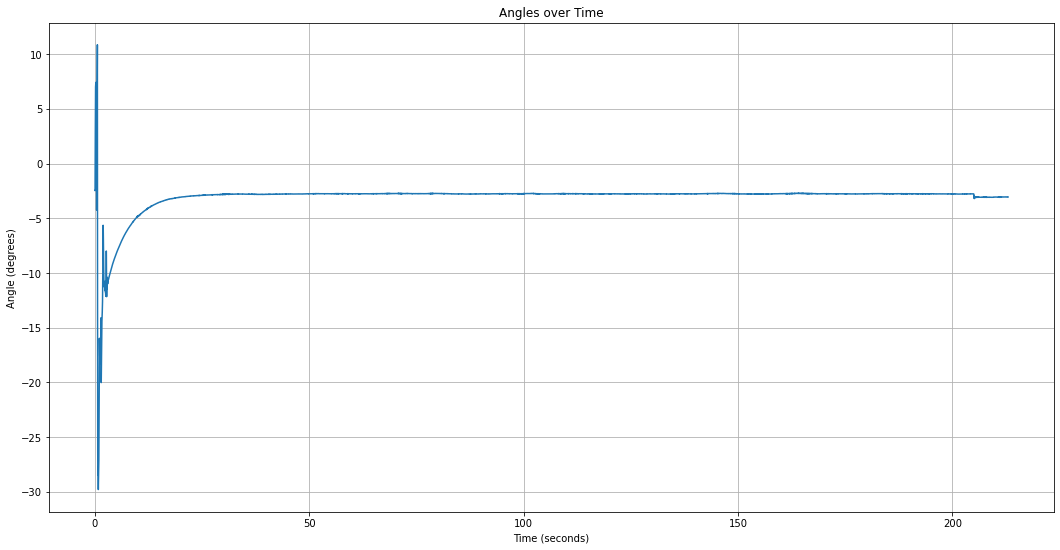

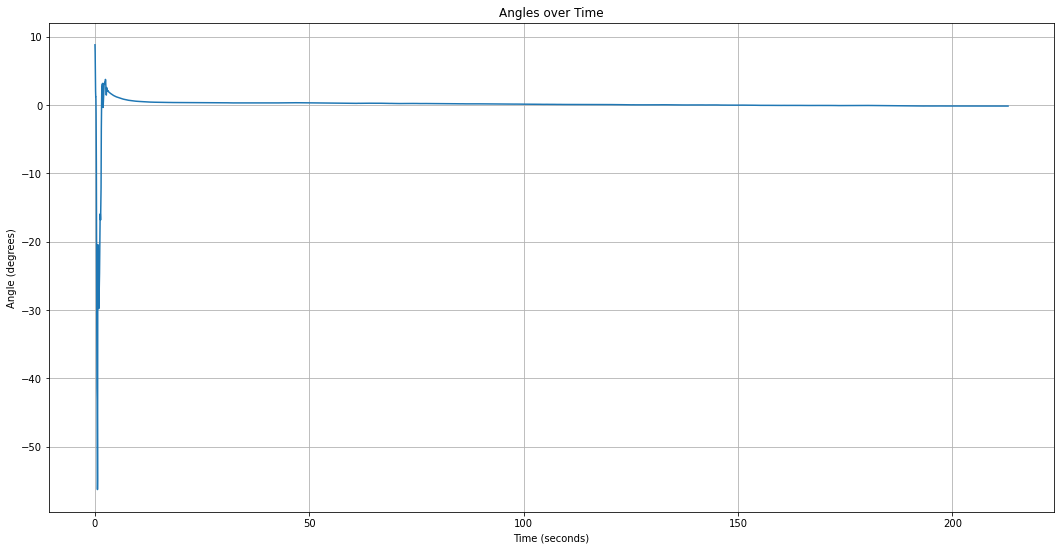

In [13]:
# Using quaternions from the sensor
roll_sens, pitch_sens, yaw_sens = compute_euler_angles(acc_LW, gyro_LW, fs, quat=quat_sensor_LW)
plot_angles_over_time(pitch_sens)
plot_angles_over_time(yaw_sens)

Using IMU Madgwick with acc and gyro only


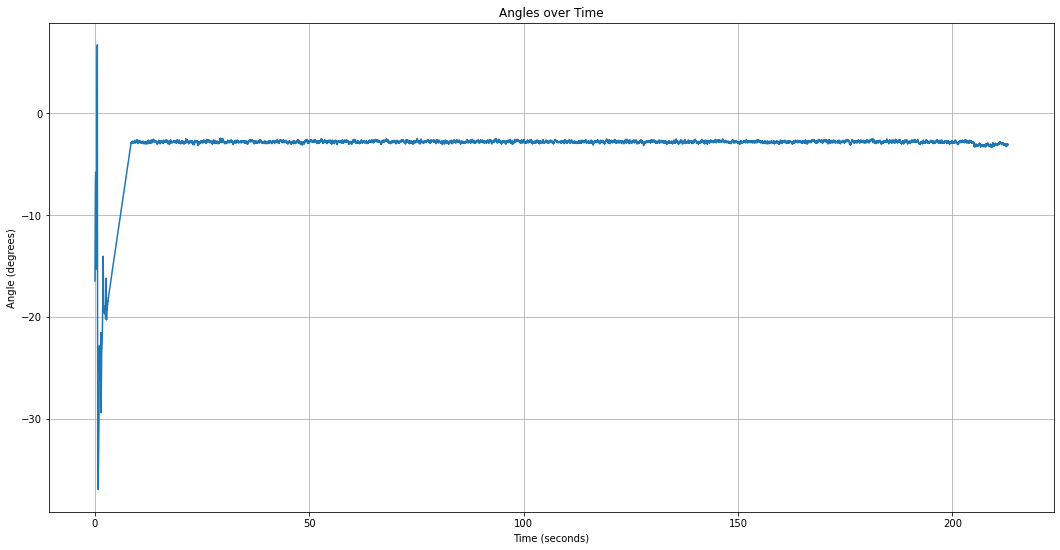

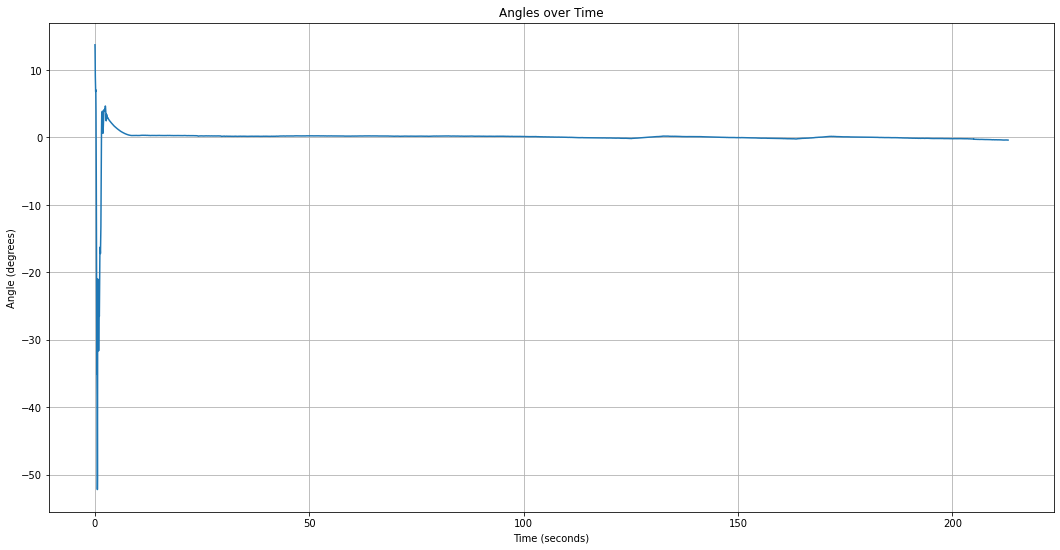

In [14]:
# Using Madgwick 
roll_mad, pitch_mad, yaw_mad = compute_euler_angles(acc_LW, gyro_LW, fs)
plot_angles_over_time((pitch_mad))
plot_angles_over_time((yaw_mad))

Using Madgwick MARG fusion


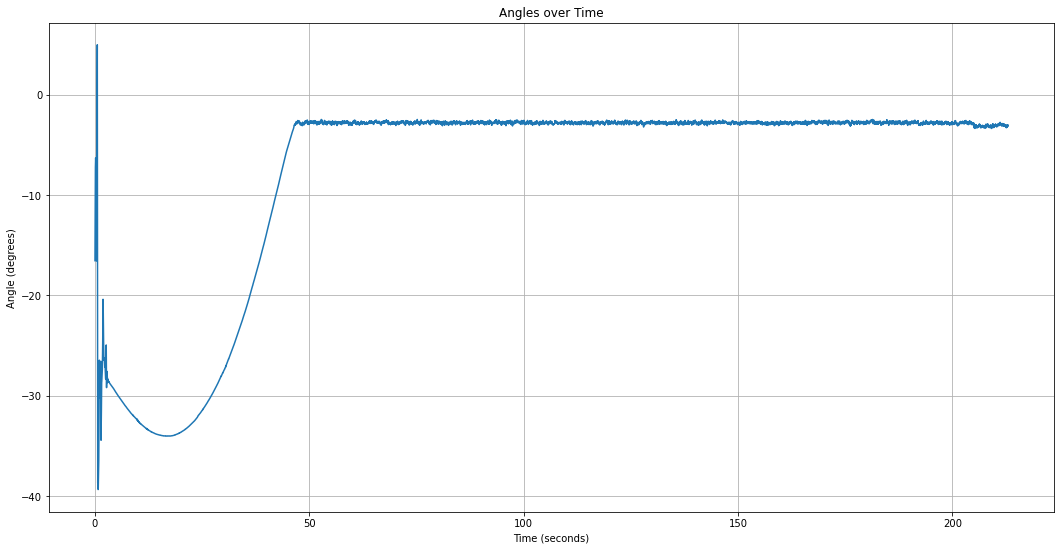

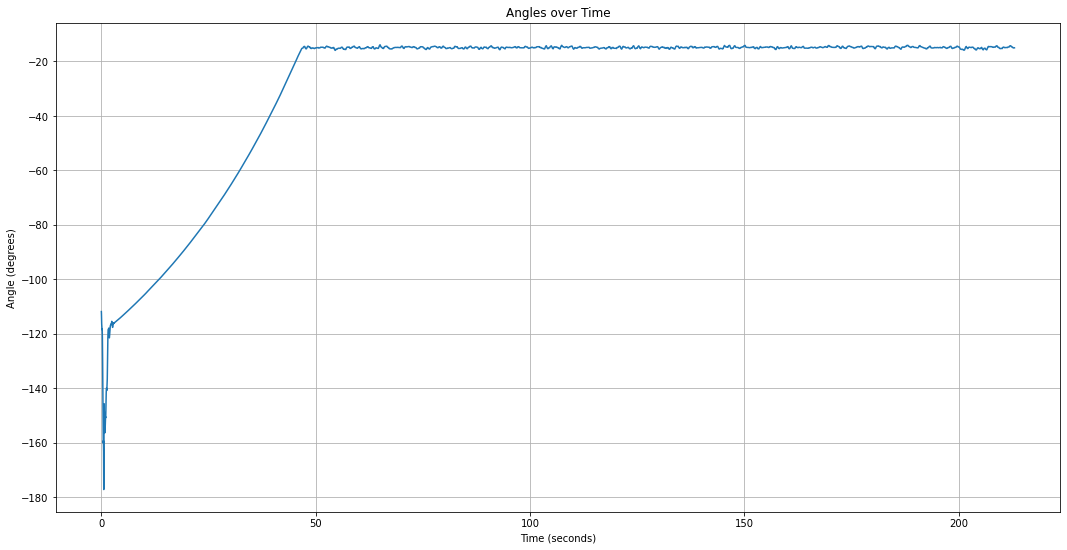

In [15]:
# Using Madgwick MARG fusion 
roll_marg, pitch_marg, yaw_marg = compute_euler_angles(acc_LW, gyro_LW, fs, quat=None, mag=mag_LW)
plot_angles_over_time(pitch_marg)
plot_angles_over_time(yaw_marg)

Using Mahony MARG fusion


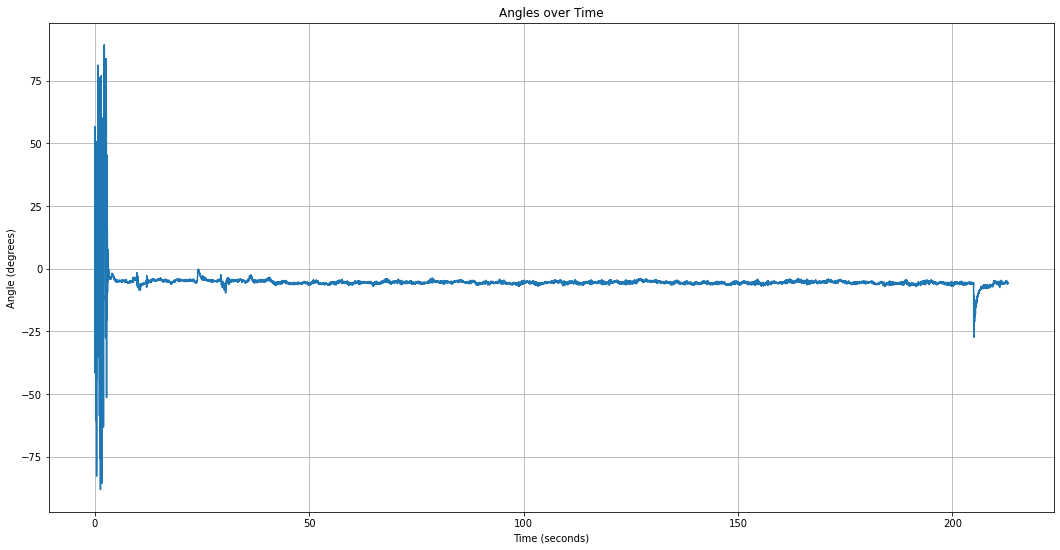

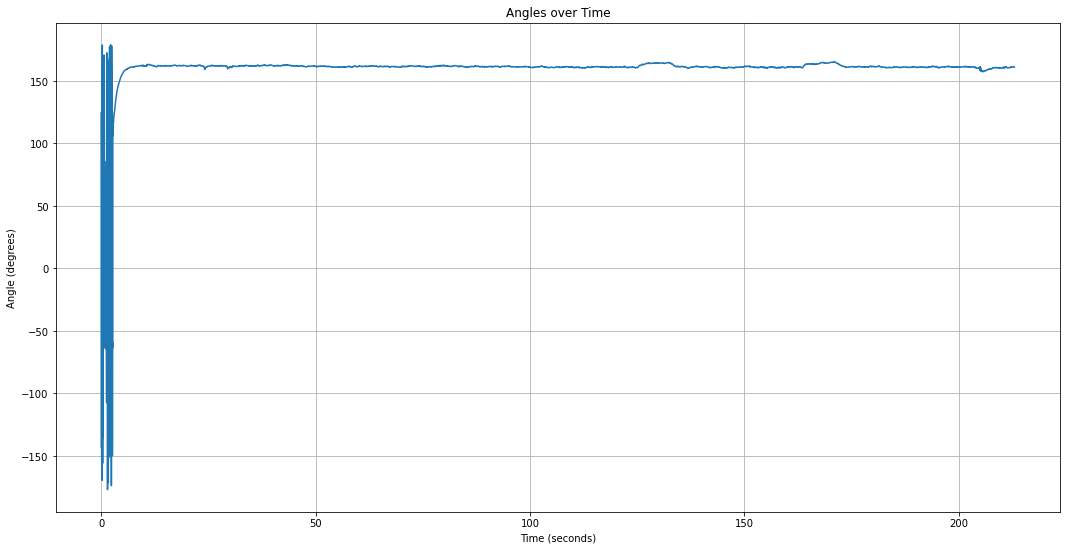

In [16]:
# Using Mahony MARG fusion 
roll_maho, pitch_maho, yaw_maho = compute_euler_angles(acc_LW, gyro_LW, fs, quat=None, mag=mag_LW, mahony=True)
plot_angles_over_time(pitch_maho)
plot_angles_over_time(yaw_maho)

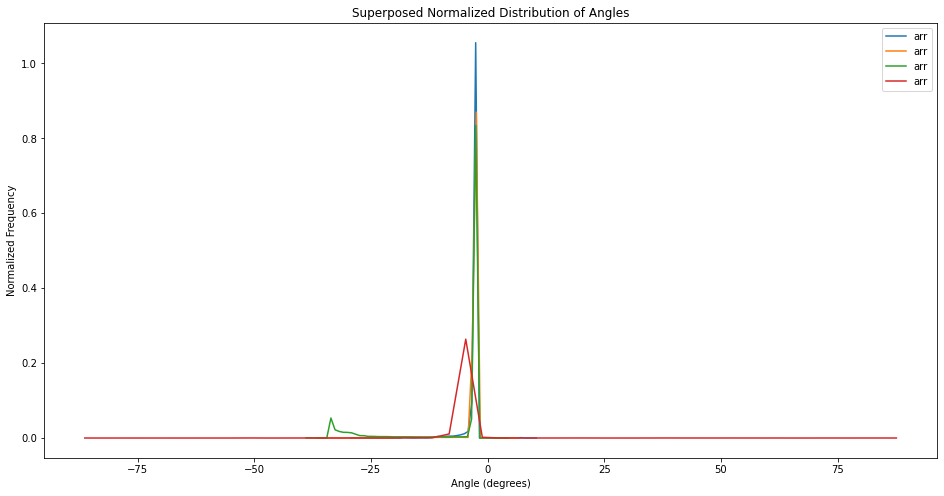

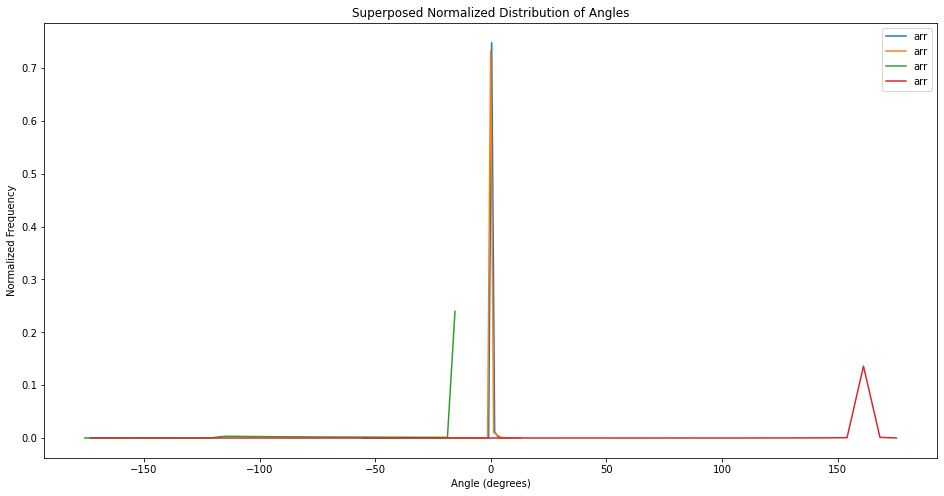

In [17]:
plot_superposed_normalized_distribution(pitch_sens, pitch_mad, pitch_marg, pitch_maho)
plot_superposed_normalized_distribution(yaw_sens, yaw_mad, yaw_marg, yaw_maho)